In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


np.random.seed(3)

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 2.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/hard_test/',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

Using TensorFlow backend.


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


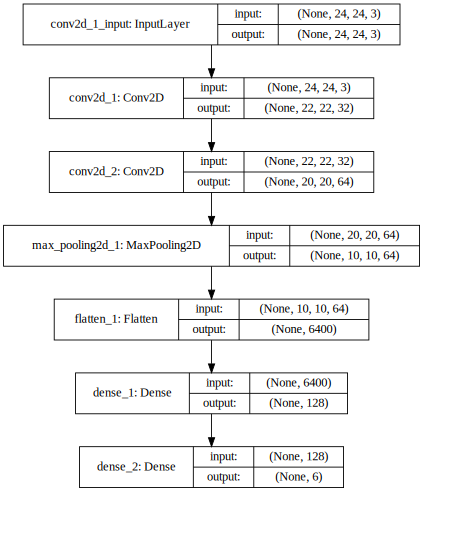

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=1500,
    epochs=200,
    validation_data=test_generator,
)

Epoch 1/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.5983 - accuracy: 0.7552 - val_loss: 3.0984 - val_accuracy: 0.5667
Epoch 2/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1951 - accuracy: 0.9330 - val_loss: 5.1077 - val_accuracy: 0.6667
Epoch 3/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1178 - accuracy: 0.9597 - val_loss: 8.2448 - val_accuracy: 0.6333
Epoch 4/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0876 - accuracy: 0.9710 - val_loss: 7.1244 - val_accuracy: 0.6667
Epoch 5/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 4.9224 - val_accuracy: 0.7000
Epoch 6/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0597 - accuracy: 0.9806 - val_loss: 0.0113 - val_accuracy: 0.7000
Epoch 7/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0520 - accuracy: 0.9822 - val_loss: 5

1500/1500 [==============================] - 26s 17ms/step - loss: 0.0200 - accuracy: 0.9951 - val_loss: 2.7397 - val_accuracy: 0.6667
Epoch 56/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.5156 - val_accuracy: 0.6667
Epoch 57/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.6971 - val_accuracy: 0.7000
Epoch 58/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 5.7416 - val_accuracy: 0.7000
Epoch 59/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0189 - accuracy: 0.9963 - val_loss: 12.1547 - val_accuracy: 0.6333
Epoch 60/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 27.5599 - val_accuracy: 0.7000
Epoch 61/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0189 - accuracy: 0.9957 - val_loss: 4.064

1500/1500 [==============================] - 26s 17ms/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.5239 - val_accuracy: 0.6667
Epoch 111/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0215 - accuracy: 0.9971 - val_loss: 27.2722 - val_accuracy: 0.7000
Epoch 112/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0154 - accuracy: 0.9976 - val_loss: 73.6481 - val_accuracy: 0.7333
Epoch 113/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0248 - accuracy: 0.9962 - val_loss: 13.0715 - val_accuracy: 0.7000
Epoch 114/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0204 - accuracy: 0.9958 - val_loss: 6.2877 - val_accuracy: 0.6333
Epoch 115/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 27.3619 - val_accuracy: 0.6333
Epoch 116/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0150 - accuracy: 0.9976 - val_los

1500/1500 [==============================] - 26s 17ms/step - loss: 0.0196 - accuracy: 0.9966 - val_loss: 29.0709 - val_accuracy: 0.7333
Epoch 165/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0132 - accuracy: 0.9974 - val_loss: 35.0325 - val_accuracy: 0.7333
Epoch 166/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0123 - accuracy: 0.9983 - val_loss: 4.5177 - val_accuracy: 0.7000
Epoch 167/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0141 - accuracy: 0.9987 - val_loss: 14.3802 - val_accuracy: 0.7333
Epoch 168/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0176 - accuracy: 0.9973 - val_loss: 71.1156 - val_accuracy: 0.7000
Epoch 169/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0188 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 0.7333
Epoch 170/200
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0136 - accuracy: 0.9982 - val

In [4]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 0s 6ms/step
accuracy: 63.33%


In [5]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

print(test_generator.filenames)

-- Predict --
{'circle': 0, 'question': 1, 'rectangle': 2, 'triangle': 3, 'v': 4, 'x': 5}
[[0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 0.000 0.999 0.001 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 0.483 0.517 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.853 0.000 0.147 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000